In [3]:
weather_translate = ["sunny", "overcast", "rainy"]
temp_translate = ["hot", "mild", "cold"]
result_translate = ["no", "yes"]

In [4]:
weather = ["sunny", "sunny","overcast", "rainy", "rainy", "rainy", "overcast","sunny","sunny","rainy", "sunny", "overcast", "overcast", "rainy" ]
temp = ['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']
result = ['no', 'no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [5]:
import numpy as np
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded = le.fit_transform(weather)
temp_encoded = le.fit_transform(temp)
result_encoded = le.fit_transform(result)
print(weather_encoded)
print(temp_encoded)
print(result_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [6]:
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [7]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(features, result_encoded)

predicted = model.predict([[0,2]])
print(predicted)

[1]


### KNN with multiple labels

In [8]:
from sklearn import datasets

wine = datasets.load_wine()

In [9]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [10]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [11]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [12]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:
print(wine.data.shape)

(178, 13)


In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [16]:
from sklearn import metrics

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6851851851851852


In [17]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [18]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')


Text(0, 0.5, 'Error mean')

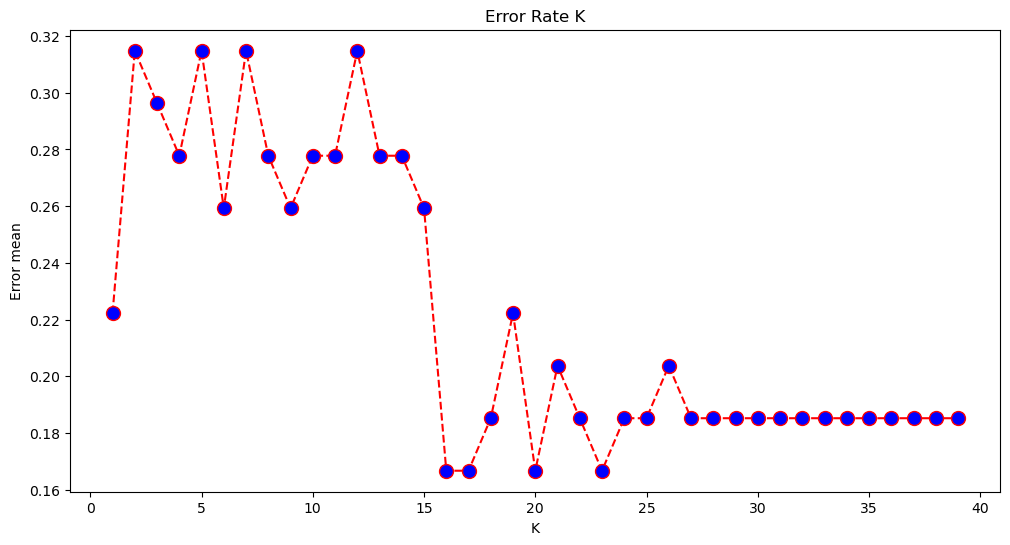

In [19]:
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

from sklearn import metrics

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8148148148148148
